# 0. Load packages and imports

In [4]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [5]:
df = pd.read_csv('sentencing_asof0405.csv')

/tmp/ipykernel_89/977872858.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sentencing_asof0405.csv')


## 0.2: Print head, dimensions, info (0 points)

In [6]:
print("Head:")
print(df.head())
print("")
print("Shape:")
print(df.shape)
print("")
print("Info:")
print(df.info())

Head:
        CASE_ID  CASE_PARTICIPANT_ID          RECEIVED_DATE  \
0  149765331439         175691153649  8/15/1984 12:00:00 AM   
1  149765331439         175691153649  8/15/1984 12:00:00 AM   
2  149765331439         175691153649  8/15/1984 12:00:00 AM   
3  149765331439         175691153649  8/15/1984 12:00:00 AM   
4  149765331439         175691153649  8/15/1984 12:00:00 AM   

    OFFENSE_CATEGORY  PRIMARY_CHARGE_FLAG    CHARGE_ID  CHARGE_VERSION_ID  \
0  PROMIS Conversion                False  50510112469       116304211997   
1  PROMIS Conversion                False  50510213021        98265074680   
2  PROMIS Conversion                False  50516447217       131972895911   
3  PROMIS Conversion                False  50516497493       131966356472   
4  PROMIS Conversion                False  50516648320        98059642859   

  DISPOSITION_CHARGED_OFFENSE_TITLE  CHARGE_COUNT        DISPOSITION_DATE  \
0               FIRST DEGREE MURDER             2  12/17/2014 12:00:00 AM  

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [11]:
values = ['CASE_ID','CASE_PARTICIPANT_ID','CHARGE_ID']
for column_name in values:
    print(column_name,"UNIQUE VALUES:")
    print(df[column_name].nunique())
    print(" ")

print('______________________________________________________________________________')
print(" ")

CASE_ID UNIQUE VALUES:
197519
 
CASE_PARTICIPANT_ID UNIQUE VALUES:
211977
 
CHARGE_ID UNIQUE VALUES:
229015
 
______________________________________________________________________________
 


#### Why are there more unique people than unique cases?
**Answer:** There are more unique people than cases because there are certain cases where multiple people are involved. For example, the CASE_ID 388821827872 involves 17 unique case participant IDs, with some people being convicted for criminal drug conspiracy and others being conviceted for possession.

In [7]:
#Why are there more unique people than unique cases?
people_per_case = df1.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique()
people_per_case.sort_values(ascending = False)

df1[df1['CASE_ID'] == 388821827872].head()

CASE_ID
388821827872    17
400683867135    17
421499635741    13
410451024505    13
387258266181    10
                ..
397942090412     1
397942384121     1
397942530976     1
397942824685     1
445593200623     1
Name: CASE_PARTICIPANT_ID, Length: 197519, dtype: int64

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
51240,388821827872,728547953866,10/27/2011 12:00:00 AM,Narcotics,False,351084750661,653015724556,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,23,5/16/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,NaN,NaN,NaN,NaN,Narcotics
51241,388821827872,728548048239,10/27/2011 12:00:00 AM,Narcotics,False,351085102592,653016378500,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,30,7/16/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 8:45:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51242,388821827872,728548142611,10/27/2011 12:00:00 AM,Narcotics,True,351079823635,653006569340,CRIMINAL DRUG CONSPIRACY,1,7/1/2014 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 7:15:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51243,388821827872,728548236983,10/27/2011 12:00:00 AM,Narcotics,False,351083141837,653012735097,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,12,7/24/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 9:59:00 AM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics
51244,388821827872,728548331355,10/27/2011 12:00:00 AM,Narcotics,False,351081784391,653010212742,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,9,5/10/2013 12:00:00 AM,...,Chicago,4/16/2011 12:00:00 AM,10/27/2011 12:00:00 AM,CHICAGO PD,NaN,10/27/2011 4:35:00 PM,NaN,NaN,12/6/2011 12:00:00 AM,Narcotics


#### Why are there more unique charges than unique people?
**Answer:** Certain individuals could have been charged either twice or multiple times. For example, the individual with the participant ID 179640159105 has 99 seperate charges, many of which are murders. Participant ID 202888754974 has 81 seperate charges, for example home invasion causing injury, kidnapping and secretly confining, battery, unlawful restraint, and attempt at first degree murder.

In [ ]:
#Why are there more unique charges than unique people?
charges_per_person = df1.groupby('CASE_PARTICIPANT_ID')['CHARGE_ID'].count()
charges_per_person.sort_values(ascending = False)

df1[df1['CASE_PARTICIPANT_ID'] == 202888754974]

In [ ]:
# Print the mean and median number of charges per case/participant

chgs_per_case = df1.groupby("CASE_ID")["CHARGE_ID"].count()
chgs_per_case.mean()
chgs_per_case.median()
# The mean number of charges per case is around 1

chgs_per_participant = df1.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].count()
chgs_per_participant.mean()
chgs_per_participant.median()
# The mean number of charges per particpant is around 1

In [12]:
# Mean and median number of charges per case
values = ['CASE_ID', 'CASE_PARTICIPANT_ID']
for name in values:
    df_charges = df.groupby(name)['CHARGE_ID'].count()
    mean_charges= df_charges.mean()
    median_charges = df_charges.median()
    print("Mean number of charges per case: ")
    print(mean_charges)
    print("Median number of charges per case: ")
    print(median_charges)
    print('______________________________________________________________________________')
    print(" ")

Mean number of charges per case: 
1.2563145823946051
Median number of charges per case: 
1.0
______________________________________________________________________________
 
Mean number of charges per case: 
1.1706270019860645
Median number of charges per case: 
1.0
______________________________________________________________________________
 


#### Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.

**Answer:** No, each participant is unique to each case. Thus, there could be an individual convicted in two different cases, but since they're different cases they would be recorded in the database differently. 

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


In [13]:
df['is_changed_offense'] = df['OFFENSE_CATEGORY'] != df['UPDATED_OFFENSE_CATEGORY']

changed_offenses = df[df['is_changed_offense']].groupby('OFFENSE_CATEGORY')['UPDATED_OFFENSE_CATEGORY'].count().sort_values(ascending=False)
print("Most common changed offenses:")
print(" ")
print(changed_offenses)

print('______________________________________________________________________________')
print(" ")

changed = df[df['is_changed_offense'] == True]
changed = changed[['OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY']]
print(changed.tail())

Most common changed offenses:
 
OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
                                ... 
Perjury                            4
Prostitution                       3
Compelling Gang Membership         2
Violate Bail Bond                  2
Benefit Recipient Fraud            2
Name: UPDATED_OFFENSE_CATEGORY, Length: 88, dtype: int64
______________________________________________________________________________
 
                                 OFFENSE_CATEGORY  \
248125               UUW - Unlawful Use of Weapon   
248126                              Other Offense   
248139  Driving With Suspended Or Revoked License   
248140  Driving With Suspended Or Revoked License   
248141                              Home Invasion   

            UPDATED_OFFENSE_CATEGORY  
248125                     Narcotics  
248126   

#### Print one example of a changed offense from one of these categories and comment on what the reason may be
 
 UUW - Unlawful use of weapons changed to Narcotics in the example above, that might mean that the reason why the person was in possession of an illegal weapon was because they were part of an illegal organization because the charges changed.

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [14]:
x = df.UPDATED_OFFENSE_CATEGORY.str.replace('Aggravated','')
arson = df['UPDATED_OFFENSE_CATEGORY'].str.contains('Arson')
homicide = df['UPDATED_OFFENSE_CATEGORY'].str.contains('Homicide')
vehicle = df['UPDATED_OFFENSE_CATEGORY'].str.contains('Vehicle')
battery = df['UPDATED_OFFENSE_CATEGORY'].str.contains('Battery')

categories = ['Arson','Homicide','Vehicle-Related','Battery']

df['simplified_offense_derived'] = np.select([arson,homicide,vehicle,battery], categories, default = x)

difference = ((int(df['UPDATED_OFFENSE_CATEGORY'].nunique())-(int(df['simplified_offense_derived'].nunique()))))

print('Difference between # of the original unique offenses, and the new simplified category is ' + str(difference))

Difference between # of the original unique offenses, and the new simplified category is 8


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [15]:
# Race

df['is_black_derived'] = df['RACE'].str.contains('Black', case=False)
# print(df['is_black_derived'])
df['is_hispanic_derived'] = df['RACE'].str.contains('Hispanic', case=False) & (df['is_black_derived'] == False)
# print(df['is_hispanic_derived'])
df['is_white_derived'] = df['RACE'].str.contains('White', case=False) & (df['is_hispanic_derived'] == False)
# print(df['is_white_derived'])
df['is_othereth_derived'] = (df['is_black_derived'] == False) & (df['is_hispanic_derived'] == False) & (df['is_white_derived'] == False)
# print(df['is_othereth_derived'])

# ______________________________________________________________________________
# Gender

df['is_male_derived'] = df['GENDER'].str.contains('Male', case=False)
# print(df['is_male_derived'])

# ______________________________________________________________________________
# Age at incident

age = df['AGE_AT_INCIDENT'].quantile(0.9999)
df['age_derived'] = np.where(df['AGE_AT_INCIDENT'] > age, age, df['AGE_AT_INCIDENT'])
# print(df['age_derived'])

# ______________________________________________________________________________
# Sentence date

df['sentenceymd_derived'] = df.SENTENCE_DATE.str.replace('12:00:00 AM', '')
# print(df['sentenceymd_derived'])

df['sentenceymd_derived'] = pd.to_datetime(df['sentenceymd_derived'], errors='coerce')
# print(df['sentenceymd_derived'])

df['sentenceym_derived'] = df['sentenceymd_derived'].dt.to_period('M').dt.to_timestamp()
# print(df['sentenceym_derived'])

# ______________________________________________________________________________
# judge

df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].astype(str)
df['judgeid_derived'] = df['SENTENCE_JUDGE'].astype('category').cat.codes.apply(lambda x: f"judge_{x+1}")

# ______________________________________________________________________________
# Printing a random sample of 10 rows 

print(df[['RACE', 'is_black_derived', 'is_hispanic_derived', 'is_white_derived', 'is_othereth_derived',
          'GENDER', 'is_male_derived', 'AGE_AT_INCIDENT', 'age_derived', 'RECEIVED_DATE',
          'sentenceymd_derived', 'sentenceym_derived', 'SENTENCE_JUDGE', 'judgeid_derived']].sample(n=10))

                              RACE is_black_derived  is_hispanic_derived  \
172803                       White            False                False   
145527                       Black             True                False   
70574                        White            False                False   
16658                        Black             True                False   
33614                        Black             True                False   
174950  White [Hispanic or Latino]            False                 True   
161796  White [Hispanic or Latino]            False                 True   
241782                       Black             True                False   
62701                        White            False                False   
190624                       White            False                False   

        is_white_derived  is_othereth_derived  GENDER is_male_derived  \
172803              True                False  Female            True   
145527           

## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [17]:
x = df[df.groupby('CASE_PARTICIPANT_ID')['CASE_PARTICIPANT_ID'].transform('count') == 1]
x

# Subset to participant's primary charge and current sentence
x = df[(df['PRIMARY_CHARGE_FLAG'] == True) & (df['CURRENT_SENTENCE_FLAG'] == True)]
x

# Filter out observations where judge is Nan
x = df[~(df['SENTENCE_JUDGE'].isnull() | (df['SENTENCE_JUDGE'] == 'FLOOD'))]
x

# Subset to sentencing timeframe
start_date = pd.to_datetime('01-01-2012', format='%m-%d-%Y')
end_date = pd.to_datetime('04-05-2021', format='%m-%d-%Y')
x = df[(df['sentenceymd_derived'] >= start_date) & (df['sentenceymd_derived'] <= end_date)]
print("Number of rows in the data:", len(x))

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hispanic_derived,is_white_derived,is_othereth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
17,154524891354,179486992996,6/15/1984 12:00:00 AM,PROMIS Conversion,False,51828594723,116500488603,FIRST DEGREE MURDER,2,9/10/2018 12:00:00 AM,...,Homicide,True,False,False,False,True,21.0,2018-09-10,2018-09-01,judge_313
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_164
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,True,33.0,2012-09-10,2012-09-01,judge_334
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_317
29,155905618978,224707989230,6/13/2001 12:00:00 AM,PROMIS Conversion,True,55609182331,798043116725,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,1,8/28/2018 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,36.0,2018-08-28,2018-08-01,judge_32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,NaN,False,False,False,True,19.0,2021-03-19,2021-03-01,judge_9
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_297
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hispanic_derived,is_white_derived,is_othereth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_41
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_313
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_164
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,True,33.0,2012-09-10,2012-09-01,judge_334
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,NaN,False,False,False,True,19.0,2021-03-19,2021-03-01,judge_9
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_297
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hispanic_derived,is_white_derived,is_othereth_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,1986-06-02,1986-06-01,judge_141
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,NaN,False,False,False,True,19.0,2021-03-19,2021-03-01,judge_9
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_297
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_101


Number of rows in the data: 220158


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [35]:
df2 = pd.read_pickle("sentencing_cleaned.pkl")
print(df2.columns.tolist())
df2[["sentenceym_derived", "sentenceymd_derived", "is_white_derived"]]

['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY', 'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID', 'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE', 'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT', 'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS', 'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION', 'CHARGE_DISPOSITION_REASON', 'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME', 'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE', 'SENTENCE_TYPE', 'CURRENT_SENTENCE_FLAG', 'COMMITMENT_TYPE', 'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days', 'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY', 'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_AGENCY', 'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE', 'FELONY_REVIEW_DATE', 'FELONY_REVIEW_RESULT', 'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY', 'is_changed_offense', 'simplified_offense_derived', 'is_black_derived', 'is_hisp_derived', 'is_white_derived', 'is_o

,sentenceym_derived,sentenceymd_derived,is_white_derived
9,2014-10-01,2014-10-16,False
16,2014-08-01,2014-08-06,False
18,2013-12-01,2013-12-02,False
19,2012-09-01,2012-09-10,False
26,2014-09-01,2014-09-19,True
...,...,...,...
248141,2021-03-01,2021-03-19,False
248142,2021-03-01,2021-03-23,False
248143,2021-03-01,2021-03-11,True
248144,2021-03-01,2021-03-11,True


## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

<Figure size 2000x1200 with 0 Axes>

(array([15340., 15522., 15706., 15887., 16071., 16252., 16436., 16617.,
        16801., 16983., 17167., 17348., 17532., 17713., 17897., 18078.,
        18262., 18444., 18628., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

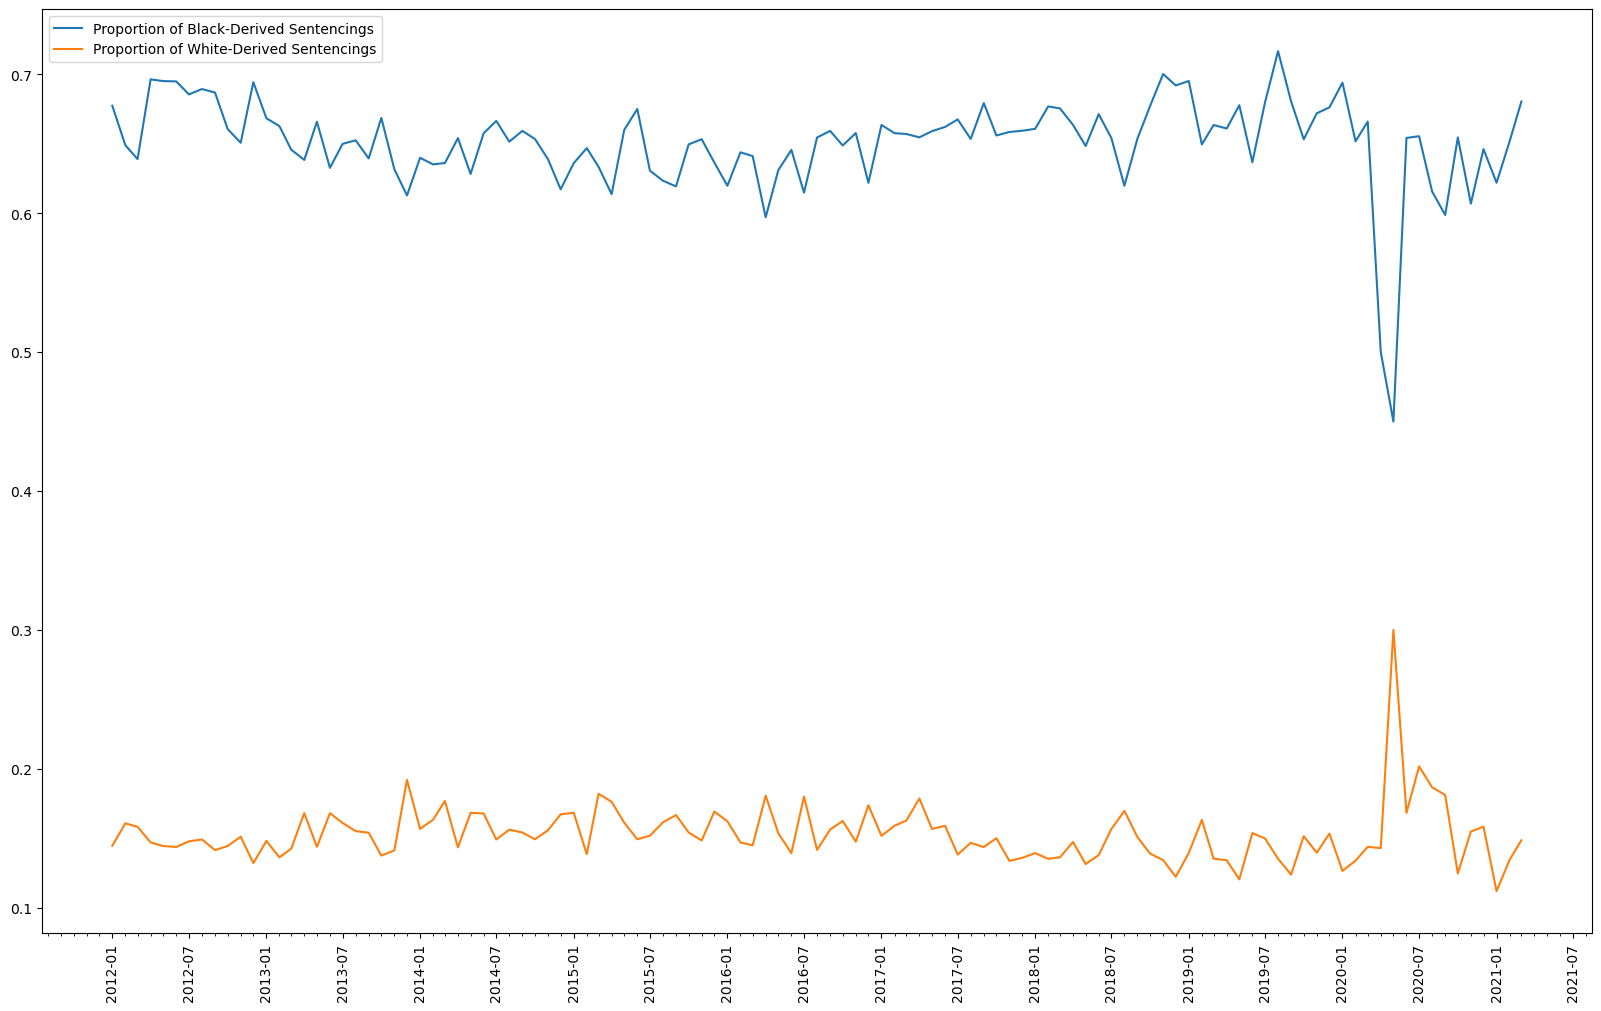

In [36]:
#Who reaches the sentencing stage?

#Creating numerators and denominators
plot1 = df2.groupby('sentenceym_derived').agg({
    'CASE_ID': 'nunique',
    'is_black_derived': 'sum', #Trues are recorded as 1
    'is_white_derived': 'sum'}).reset_index()

plot1["prop_black_derived"] = plot1["is_black_derived"] / plot1["CASE_ID"]
plot1["prop_white_derived"] = plot1["is_white_derived"] / plot1["CASE_ID"]

plt.figure(figsize=(20, 12))
plt.plot(plot1.sentenceym_derived, plot1.prop_black_derived, label = "Proportion of Black-Derived Sentencings")
plt.plot(plot1.sentenceym_derived, plot1.prop_white_derived, label = "Proportion of White-Derived Sentencings") 
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)

#### Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

The proportion of black-derived sentencings per month, $\frac{\sum_{i=1}^{N} B_i}{N}$, has historically been higher per month than the proportion of white-derived sentencings per month, $\frac{\sum_{i=1}^{N} W_i}{N}$, suggesting an inequal sentencing rate based on race.

$B_i$ = Proportion of black individuals sentences in case $i$

$W_i$ = Proportion of white individuals sentences in case $i$

$N$ = Total number of cases in month

April and May 2020, which were at the start of the pandemic, saw lessened proportions of sentencing for both white and black defendants, thus implying the effects of COVID-19 caused sentencing rates to decrease drastically.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

,sentenceym_derived,black_inc,white_inc,is_black_derived,is_white_derived,pct_black,pct_white,difference
96,2020-01-01,361,55,796,145,45.351759,37.931034,7.420724
97,2020-02-01,267,42,526,108,50.760456,38.888889,11.871567
98,2020-03-01,146,30,315,68,46.349206,44.117647,2.231559
99,2020-04-01,0,1,7,2,0.000000,50.000000,-50.000000
100,2020-05-01,5,1,9,6,55.555556,16.666667,38.888889
101,2020-06-01,33,2,70,18,47.142857,11.111111,36.031746
102,2020-07-01,79,12,156,48,50.641026,25.000000,25.641026
103,2020-08-01,86,21,221,67,38.914027,31.343284,7.570744
104,2020-09-01,140,28,291,88,48.109966,31.818182,16.291784
105,2020-10-01,182,14,415,79,43.855422,17.721519,26.133903


<Figure size 2000x1200 with 0 Axes>

Text(0, 0.5, 'Difference (%)')

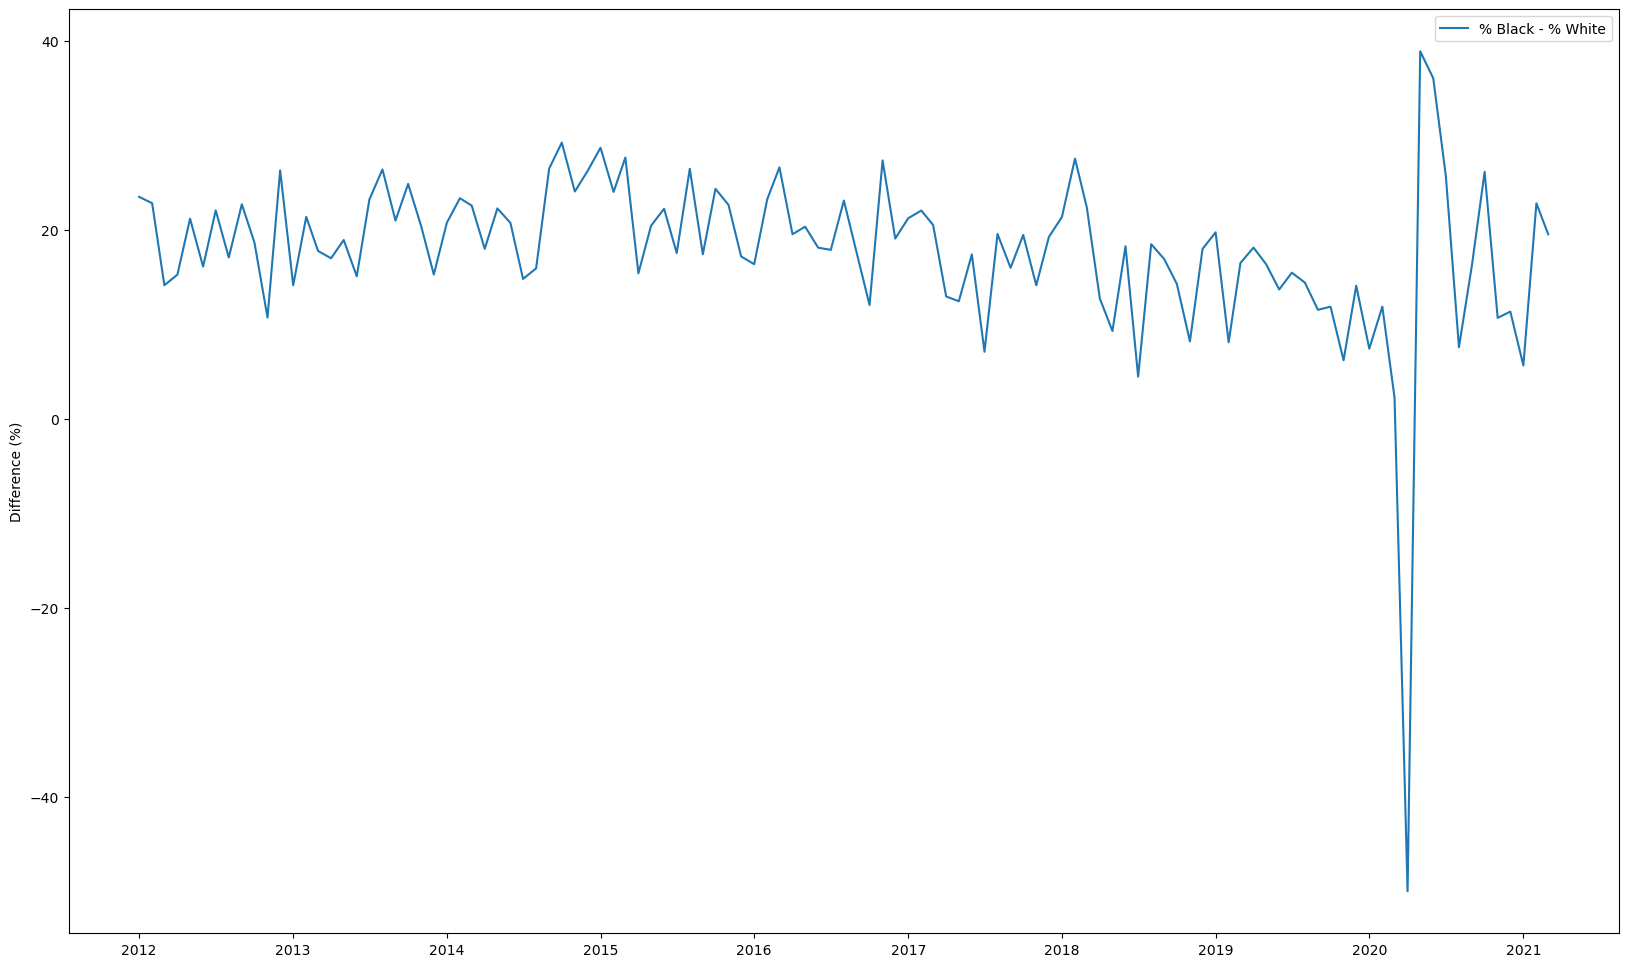

In [37]:
defendants = plot1[["sentenceym_derived", "is_black_derived", "is_white_derived"]]

plot2 = df2[df2["COMMITMENT_TYPE"] == "Illinois Department of Corrections"]
plot2 = plot2.groupby("sentenceym_derived").agg(
    black_inc = ('is_black_derived', 'sum'),
    white_inc = ('is_white_derived', 'sum')).reset_index()

plot2 = pd.merge(plot2, defendants, on = 'sentenceym_derived')
plot2["pct_black"] = (plot2["black_inc"] / plot2["is_black_derived"]) * 100
plot2["pct_white"] = (plot2["white_inc"] / plot2["is_white_derived"]) * 100
plot2["difference"] = plot2["pct_black"] - plot2["pct_white"]

plot2[plot2["sentenceym_derived"].dt.year == 2020]

plt.figure(figsize=(20, 12))
plt.plot(plot2["sentenceym_derived"], plot2["difference"], label='% Black - % White')
plt.legend()
plt.ylabel('Difference (%)')

#### Write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

Before 2020, gaps seemed to be getting smaller and closer to a 0% difference. There was a significant widening of rates right around when COVID-19 hit. For instance, in 2020-04, there were 0 black incarcerations and 1 white incarceration But after COVID-19, there was a widening in differences, with processes halted by COVID-19 restrictions coming back.

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [5]:
top_black_offense = df2[df2["is_black_derived"] == True].groupby("simplified_offense_derived").agg(
    quantity = ('simplified_offense_derived','count')).sort_values(by='quantity', ascending=False).head(10)

top_white_offense = df2[df2["is_white_derived"] == True].groupby("simplified_offense_derived").agg(
    quantity = ('simplified_offense_derived','count')).sort_values(by = 'quantity', ascending=False).head(10)

frequent_offenses = set(top_black_offense.index.tolist() + top_white_offense.index.tolist())
frequent_offenses

{'Battery',
 'Burglary',
 'DUI',
 'Driving With Suspended Or Revoked License',
 'Narcotics',
 'Other Offense',
 'Residential Burglary',
 'Retail Theft',
 'Robbery',
 'Theft',
 'UUW - Unlawful Use of Weapon',
 'Vehicle-related'}

### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?

In [6]:
top_10 = df2[df2['simplified_offense_derived'].isin(frequent_offenses)]

top10_counts = top_10.groupby('simplified_offense_derived').agg(
    count = ('simplified_offense_derived','count'),
    inc_black = ('is_black_derived', 'sum'),
    inc_white = ('is_white_derived', 'sum'))

top10_counts["prop_black"] = top10_counts["inc_black"] / top10_counts["count"]
top10_counts["prop_white"] = top10_counts["inc_white"] / top10_counts["count"]
top10_counts["disparities"] = top10_counts["prop_black"] - top10_counts["prop_white"]
top10_counts.sort_values(by = "disparities", ascending = False)

,count,inc_black,inc_white,prop_black,prop_white,disparities
simplified_offense_derived,,,,,,
UUW - Unlawful Use of Weapon,11885,9608,527,0.808414,0.044342,0.764072
Robbery,2997,2348,224,0.783450,0.074741,0.708709
Narcotics,38780,29451,4923,0.759438,0.126947,0.632491
Vehicle-related,3354,2400,362,0.715564,0.107931,0.607633
Battery,7432,4650,1448,0.625673,0.194833,0.430840
Residential Burglary,3688,2282,717,0.618764,0.194414,0.424349
Retail Theft,10546,6812,2509,0.645932,0.237910,0.408022
Driving With Suspended Or Revoked License,8125,4459,1160,0.548800,0.142769,0.406031
Burglary,6431,3798,1454,0.590577,0.226092,0.364485


#### Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?

Unlawful use of Weapon (UUW), Robbery, and Narcotics show some of the largest disparities in sentencing between black and white defendants. 80% of all sentenced defendants for UUW were Black, while only 4% were white. This data speaks to and relates with sociological qualitative/theoretical/social interactions about prejudice. 

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


(0.5477707006369427, 0.5789473684210527)

,month,pre,post
0,2,0.547771,0.578947
1,4,0.490066,0.467836
2,8,0.496503,0.426471
3,12,0.532315,0.453682


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Bandwidth')

Text(0, 0.5, 'Size of Incarceration Rate Gap (Black - White)')

Text(0.5, 1.0, 'Incarceration Rate Differences for Different Bandwidths')

([<matplotlib.axis.XTick at 0x7fb7a10e8400>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

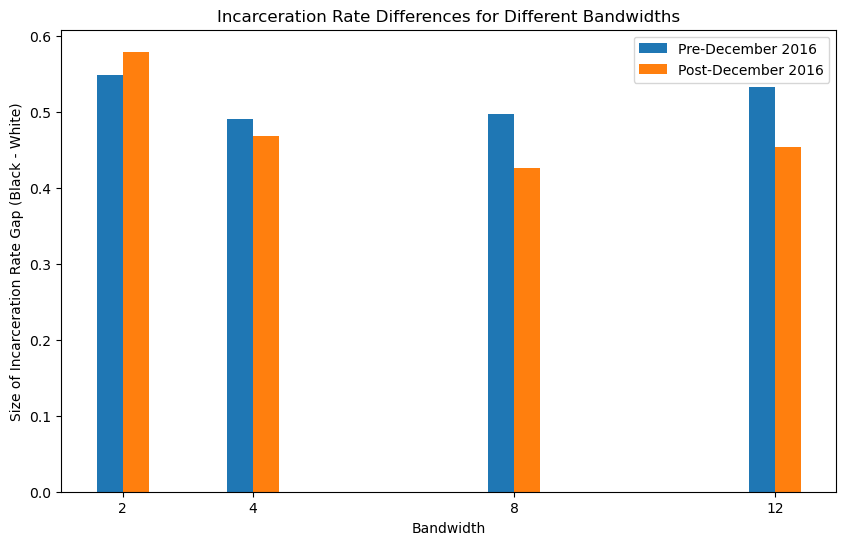

In [153]:
#Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):
#Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)
#Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)
#Compare Black-White disparities using an eight-month bandwidth
#Compare Black-White disparities using a twelve-month bandwidth

bandwidth_disp = df2[((df2["COMMITMENT_TYPE"] == "Illinois Department of Corrections") & (df2['simplified_offense_derived'] == 'Retail Theft'))]


#bandwidth_disp[(bandwidth_disp['sentenceym_derived'] >= '2016-10-01') & (bandwidth_disp['sentenceym_derived'] <= '2016-12-01')]

def disparities(bandwidth, df):

    #Define start and end points
    if bandwidth < 12:
        pre_month = 12 - bandwidth
        post_month = bandwidth % 12
        pre_year = 2016
        post_year = 2017
        
    elif bandwidth == 12:
        pre_month = 12
        post_month = 12
        pre_year = 2015
        post_year = 2017
        
    else:
        pre_month = 12 - (bandwidth % 12) #12
        post_month = bandwidth % 12 #1
        pre_year = 2016 - (bandwidth // 12)
        post_year = 2017 + ((bandwidth + 1) // 12) 

    if post_month == 0:
        post_month = 12
        
    pre_date = pd.to_datetime(str(pre_year) + "-" + str(pre_month) + "-01")
    post_date = pd.to_datetime(str(post_year) + "-" + str(post_month) + "-01")
    
    #Find differences
    black_pre = df[(df['sentenceym_derived'] >= pre_date) & (df['sentenceym_derived'] < '2016-12-01')]['is_black_derived'].sum()
    black_post = df[(df['sentenceym_derived'] > '2016-12-01') & (df['sentenceym_derived'] <= post_date)]['is_black_derived'].sum()
    
    white_pre = df[(df['sentenceym_derived'] >= pre_date) & (df['sentenceym_derived'] < '2016-12-01')]['is_white_derived'].sum()
    white_post = df[(df['sentenceym_derived'] > '2016-12-01') & (df['sentenceym_derived'] <= post_date)]['is_white_derived'].sum() 
    
    pre_frame = df[(df['sentenceym_derived'] >= pre_date) & (df['sentenceym_derived'] < '2016-12-01')]
    pre = len(pre_frame)
    post_frame = df[(df['sentenceym_derived'] > '2016-12-01') & (df['sentenceym_derived'] <= post_date)]
    post = len(post_frame)
    
    pre_disparity = (black_pre - white_pre) / pre
    post_disparity = (black_post - white_post) / post
                             
    return pre_disparity, post_disparity


disparities(2, bandwidth_disp)

months = [2, 4, 8, 12]

frames = []

for number in months:
    pre, post = disparities(number, bandwidth_disp)  # Assuming disparities() returns two values
    df = pd.DataFrame({'month': [number], 'pre': [pre], 'post': [post]})
    frames.append(df)

plot3 = pd.concat(frames, ignore_index=True)
    
plot3 = pd.DataFrame(plot3)
plot3

plt.figure(figsize=(10, 6))

# Pre values
plt.bar(plot3['month'] - 0.2, plot3['pre'], width=0.4, label='Pre-December 2016')

# Post values
plt.bar(plot3['month'] + 0.2, plot3['post'], width=0.4, label='Post-December 2016')

plt.xlabel('Bandwidth')
plt.ylabel('Size of Incarceration Rate Gap (Black - White)')
plt.title('Incarceration Rate Differences for Different Bandwidths')
plt.xticks(plot3['month'])
plt.legend()
plt.show()

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

For those who argue that the retail theft policy change narrowed disparities, the graph above shows that the values have decreased the incarceration rate gap after the 4-month bandwidth. For those who argued that the change may widen disparities, as bandwidth increases from 8 to 12, there is a slight increase which could indicate that as time goes on, the difference may return. 